<a href="https://colab.research.google.com/github/Lasttrader/LT_finance_and_trading/blob/master/09_04_2023_fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fintech plan

In [ ]:
'''
План:
1. +Разработка коннектор Bybit с записью в БД

2. Разработка отрисовка графиков
+bb
+candles
-external candles

3. Отрисовка индикаторов
+ high low
+ bb
+ external chart

4. + Разработка алгоритма BB
5. + Получение high and low, фракталов
6.  Разработка открытия закрытия стоп и Тейк
7. Разработка метода учёта сделок
8. Тестирование алгоритма BB
'''

'\nПлан:\n1. +Разработка коннектор Bybit с записью в БД\n\n2. Разработка отрисовка графиков\n+bb\n+candles\n-external candles\n\n3. Отрисовка индикаторов\n+high low\n+bb\n-external chart\n\n4. Разработка алгоритма BB\n5. +Получение high and low, фракталов\n6. Разработка открытия закрытия стоп и Тейк\n7. Тестирование алгоритма BB\n'

#Import

In [ ]:
!pip install pybit
!pip install qgrid

In [2]:

#bybit
import requests 
import json 
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import qgrid
import time

#plotly
import plotly.graph_objects as go

print('hello! imports finished success')

hello! imports finished success


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#data from Gdrive
path_6e = '/content/drive/MyDrive/_LT/CME quotes/6E/6e_m240_20130101_20131231.csv'

#Sources

In [ ]:
'''
Class connectors
Тип коннектора
-тинькоф
-сб РФ
-фридом
-райф
-bybit
-bingx
-БД postgresql
-БД mongodb
-БД clickhouse
-tradingview

Токен: 
Адрес:
БД
Логин
Пароль
'''

In [ ]:
class Sources:
  pass
  
  class Tinkoff:
    pass

  class Sber:
    pass

  class Freedom:
    pass
  
  class Raif:
    pass

  class Bybit:
    pass

  class BingX:
    pass
 
  class Postgresql:
    pass

  class MongoDB:
    pass

  class Clickhouse:    
    pass    

  class Tradingview:    
    pass

In [ ]:
'''
import math
class circle():
    def __init__(self,radius):
        self.radius=radius
    def area(self):
        return math.pi*(self.radius**2)
    def perimeter(self):
        return 2*math.pi*self.radius
 
r=int(input("Enter radius of circle: "))
obj=circle(r)
print("Area of circle:",round(obj.area(),2))
print("Perimeter of circle:",round(obj.perimeter(),2))
'''

'\nimport math\nclass circle():\n    def __init__(self,radius):\n        self.radius=radius\n    def area(self):\n        return math.pi*(self.radius**2)\n    def perimeter(self):\n        return 2*math.pi*self.radius\n \nr=int(input("Enter radius of circle: "))\nobj=circle(r)\nprint("Area of circle:",round(obj.area(),2))\nprint("Perimeter of circle:",round(obj.perimeter(),2))\n'

#ETL

In [ ]:
'''
Class ETL

Тип etl
-sql
-python
'''

class ETL:
  pass

#Connectors

In [ ]:
'''Class Источники
Получить коннектор
Def Получить котировку
Def Получить тиковые данные
Market_replay'''

class connectors:
  def getConnector():
    return


#Visualization

In [ ]:
'''Class График
Нарисовать
Сохранить'''

In [ ]:
'''Class Индекаторы 
Горизонтальный объём
Индикатор внешнего таймфрейма
Болшинджер бэндс'''

#Indicators

In [19]:
class Indicators():
  def getBollingerBand(
                       data: pd.DataFrame,
                       ma_size : int,
                       bol_size : int,
                       column_name : str,
                       inplace_status : bool ):
    '''
    Add Bollinger Band values to dataframe
    '''
    # Define the parameters for the Bollinger Band calculation
    ma_size = 21
    bol_size = 2
    column_name = 'close'

    # Calculate the SMA
    data.insert(0, 'moving_average', data[column_name].rolling(ma_size).mean())
    
    # Calculate the upper and lower Bollinger Bands
    data.insert(0, 'bol_upper', data['moving_average'] + data[column_name].rolling(ma_size).std() * bol_size)
    data.insert(0, 'bol_lower', data['moving_average'] - data[column_name].rolling(ma_size).std() * bol_size)

    if inplace_status == True:
    # Remove the NaNs -> consequence of using a non-centered moving average (Optional)
      data.dropna(inplace=True)
    return data

#Patterns

#Trading and orders (Auto)


#Money management

#Notifications

#Testing

#Machine learning

In [ ]:
'''Class анализ паттернов
Class tech indicators
Проверить при входе
Значение индикаторов в момент сделки
Class управление капиталом
Расчитать размер позиции
Class торговля
Ордер
Тейк
Стоп
Class уведомления
Class машинного обучения
Class screener'''

In [ ]:
'''Get_chart()
Объем повышение
Выставить ордер на минимум
Тейк 1 и 2 до объёма
Ордер на углы по объему V и А 4 часа
Получить график
Разбить на неделю
На день
На 4 часа
Определитт тренд и флэт по объему POC
проанализировать прошлую неделю на:
Углы по 4 часа
На фикспрефикс
На объём прошлой недели 
оценить объём по статистике
выставка ордера
Выставка стопа
Вы вставки Тейк на Макс
Выставка Тейк на х2
Скриншот
Пубшикации
Сопровождения
Скриншоты
Публикация
Статистика
Тренажёр
Подписка
Алгоритмы в торговле
Фикс префикс
 - Вход от фикса
тестирование  обьемного уровня
 - Вход на отскок
Тестирование Макс дельты внешней свечи
 - Вход от последнего уровня
 - Вход через 1 уровень
Зоны продавцов и покупателей
 - Треугольник выход вход на тесте
Торговля по тренду'''

In [ ]:
'''Get-graph 
Получаем график данные
 1. Получение графика и данных
 2. Проверка  времени понедельник 0000
 3.  получение данных недели ohlc
 4. Сравнение с предыдущей неделей
 5. Тип недели тренд, расширение, внутренняя
 6. Проверка BB получение уровней
 7. проверка H4 get dodgi и получение данных +/- 3 бара
 8. Проверка объёмов и дельты получение данных
 9. Проверка внутренней структуры недели где закрытие
 -если внутри то ФПФ
 -если снаружи то тест
 Входы
 Ohlc меньше ohlc - 1
  от ББ
  от уровня боли + зеркала (проверить виделали цена в прошлом)
  от доджи
 через 1 уровень  объема'''

#Workshop

In [7]:
#bybit
# опрделяем функцию, которая будет получать данные и возвращать нам датафрейм pandas
# в качестве аргументов передаём
'''
symbol - тикет криптовалюты, данные по которой хотим получить
interval - интервал, таймфрейм (час, день, неделя и т.д.)

\startTime - время начала 
endTime - конечное время
'''

SYMBOL = 'ETHUSD'
INTERVAL = 240 #in minutes
START_TIME = dt.datetime(2023, 4, 10) #YY-MM-DD
END_TIME = dt.datetime(2023, 5, 10) #YY-MM-DD

def get_bybit_bars(symbol, 
                   interval, 
                   startTime, 
                   endTime): 
    #пишем адрес, где получаем данные
    url = "https://api.bybit.com/v2/public/kline/list"
    #определяем начало времени
    startTime = str(int(startTime.timestamp()))
    #определяем конечное время
    endTime   = str(int(endTime.timestamp()))
    #определяем параметры аргументов
    req_params = {"symbol" : symbol, 'interval' : interval, 'from' : startTime, 'to' : endTime}
    #создаем pandas датафрейм
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text)['result'])
    if (len(df.index) == 0):
        return None
    #в качесвте индекса датафрейма будем использовать временную метку
    df.index = [dt.datetime.fromtimestamp(x) for x in df.open_time]
    # возвращаем датафрейм
    return df
#создаем датафрейм и спользуем функцию get_bybit_bars, которую создали
data = get_bybit_bars(SYMBOL, INTERVAL, START_TIME, END_TIME)

'''
проходим циклом по каждой колонке нашей таблицы
пробуем преобразовать данные в тип "число с плавающей точкой", 
т.к. по умолчанию может приходит тип object
'''
for i in data.columns:
  try:
    data[i]=data[i].astype('float')
  except:
    print(f'error {i}')
print(data.info())
#выводим первые 5 строк нашей таблицы
data.head()

error symbol
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2023-04-10 00:00:00 to 2023-05-13 04:00:00
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     200 non-null    object 
 1   interval   200 non-null    float64
 2   open_time  200 non-null    float64
 3   open       200 non-null    float64
 4   high       200 non-null    float64
 5   low        200 non-null    float64
 6   close      200 non-null    float64
 7   volume     200 non-null    float64
 8   turnover   200 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.6+ KB
None


,symbol,interval,open_time,open,high,low,close,volume,turnover
2023-04-10 00:00:00,ETHUSD,240.0,1.681085e+09,1858.70,1863.75,1846.65,1858.00,9994530.0,5385.077287
2023-04-10 04:00:00,ETHUSD,240.0,1.681099e+09,1858.00,1866.00,1854.00,1860.65,9177677.0,4934.996302
2023-04-10 08:00:00,ETHUSD,240.0,1.681114e+09,1860.65,1863.30,1856.25,1858.00,8384886.0,4507.736281
2023-04-10 12:00:00,ETHUSD,240.0,1.681128e+09,1858.00,1869.50,1847.30,1861.80,23429457.0,12615.336055
2023-04-10 16:00:00,ETHUSD,240.0,1.681142e+09,1861.80,1905.00,1857.85,1889.55,49334872.0,26138.040867


In [14]:
#load data from Gdrive
data_6e = pd.read_csv(path_6e, sep = ';')
data_6e['date_time'] = data_6e['OPEN_DATE'] + ' ' + data_6e['OPEN_TIME']
data_6e['date_time'] = pd.to_datetime(data_6e['date_time'])
data_6e = data_6e[~data_6e.index.duplicated(keep='last')]
#print(data_6e.head(20))
data_6e.drop(['OPEN_DATE',	'OPEN_TIME',	'CLOSE_DATE',	'CLOSE_TIME'], axis =1, inplace = True)
data_6e.columns = map(str.lower, data_6e.columns)
data = data_6e
data.head()

,open,high,low,close,volume,delta,ask,bid,expiration,date_time
0,1.3264,1.3264,1.3203,1.3258,16820,578,8699,8121,03-13,2013-02-01 10:00:00
1,1.3259,1.3287,1.3245,1.3247,68962,-254,34354,34608,03-13,2013-02-01 14:00:00
2,1.3252,1.3251,1.3162,1.3184,74321,-167,37077,37244,03-13,2013-02-01 18:00:00
3,1.3183,1.3199,1.3183,1.3191,7326,352,3839,3487,03-13,2013-02-01 22:00:00
4,1.3183,1.3196,1.3185,1.3191,1508,-226,641,867,03-13,2013-02-01 22:00:00


In [ ]:
data['bottom'] = np.nan
data['top'] = np.nan
for i in range(len(data.index)):
  try:
    if data.close[i] > data.close[i-1] and \
      data.close[i-1]< data.close[i-2] and \
      data.high[i] > data.high[i-1] and \
      data.high[i-1]< data.high[i-2] and \
      data.low[i] > data.low[i-1] and \
      data.low[i-1]< data.low[i-2]:
      #print('bottom is ', data.low[i])
      data['bottom'][i-1] = data.low[i]     

    if data.close[i] < data.close[i-1] and \
      data.close[i-1]> data.close[i-2] and \
      data.high[i] < data.high[i-1] and \
      data.high[i-1]> data.high[i-2] and \
      data.low[i] < data.low[i-1] and \
      data.low[i-1]> data.low[i-2]:
      #print('top is ', data.high[i])
      data['top'][i-1] = data.high[i]
  except:
    print('er')

[nan, 1.3287, nan, nan, nan, 1.3198, nan, 1.3178, nan, 1.3129, nan, nan, nan, 1.3059, nan, nan, nan, 1.31, nan, nan, nan, nan, nan, 1.3128, nan, nan, 1.3148, nan, 1.314, nan, nan, 1.3095, nan, nan, nan, 1.3104, nan, 1.3088, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.3373, nan, nan, nan, 1.3413, nan, nan, nan, nan, 1.3401, nan, 1.3401, nan, 1.3395, nan, nan, nan, nan, 1.3325, nan, 1.3332, nan, nan, nan, nan, 1.3321, nan, nan, nan, 1.3394, nan, nan, nan, 1.3404, nan, nan, nan, nan, nan, nan, 1.3377, nan, nan, nan, 1.3333, nan, 1.3335, nan, nan, 1.336, nan, 1.3329, nan, nan, 1.3352, nan, nan, 1.3398, nan, nan, nan, nan, nan, 1.3485, nan, nan, 1.3475, nan, nan, nan, 1.3482, nan, nan, nan, nan, 1.3465, nan, nan, 1.3503, nan, nan, nan, nan, nan, nan, 1.3592, nan, 1.3588, nan, nan, 1.3588, nan, 1.3598, nan, nan, nan, nan, nan, nan, 1.3715, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.352, nan, nan, nan, 1.3602, nan, nan, 1.36, nan, nan, nan, nan, nan, nan, nan, nan, 1.358

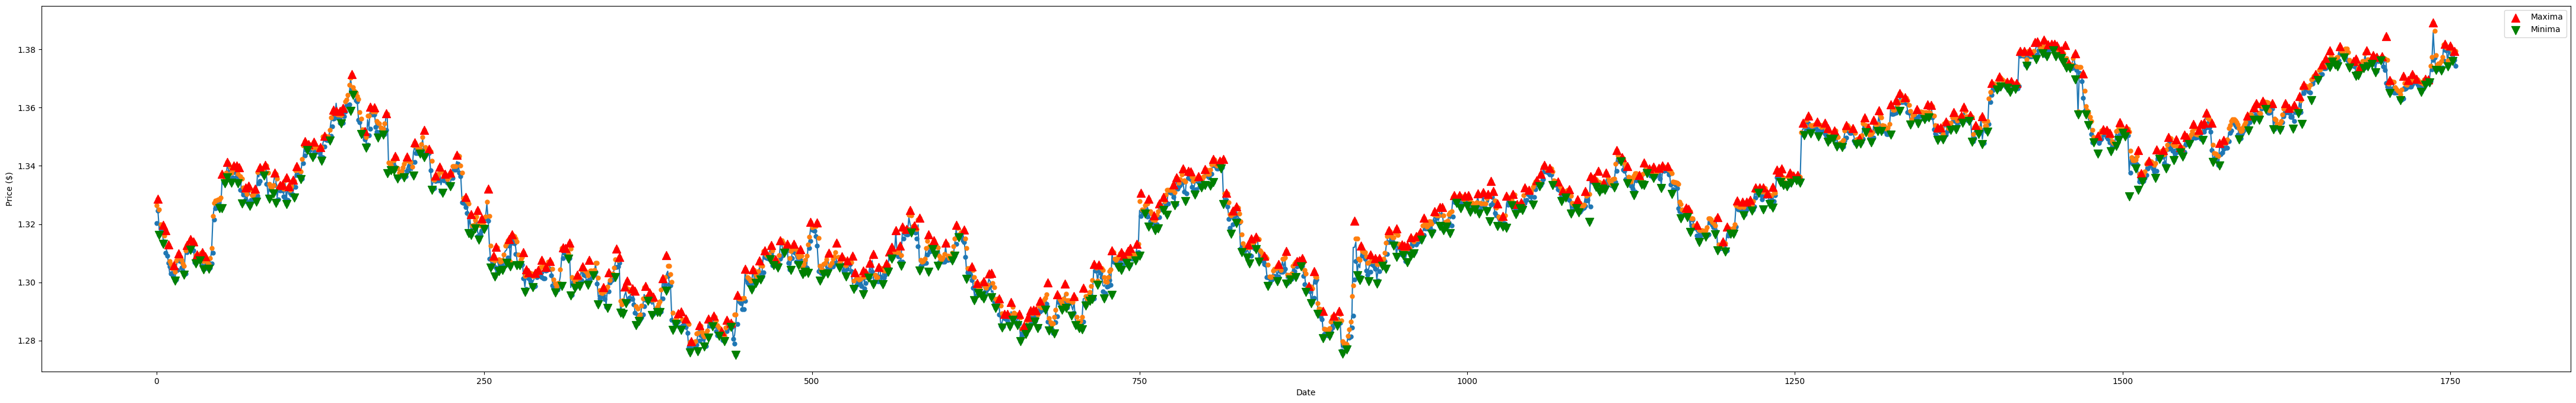

In [22]:

#local max close
data['local_max'] = data['high'][
  (data['high'].shift(1) < data['high']) &
  (data['high'].shift(-1) < data['high'])]

#local min close
data['local_min'] = data['low'][
  (data['low'].shift(1) > data['low']) &
  (data['low'].shift(-1) > data['low'])]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print(list(data['local_max']))
#plot
plt.figure(figsize=(55, 8))
plt.plot(data['close'], zorder=0)
plt.scatter(data.index, data['low'], s=25)
plt.scatter(data.index, data['high'],s=25)
plt.scatter(data.index, data['local_max'], s=100,
  label='Maxima', marker='^', c='r')
plt.scatter(data.index, data['local_min'], s=100,
  label='Minima', marker='v', c='g')
plt.xlabel('Date')
plt.ylabel('Price ($)')
#plt.title(f'Local Maxima and Minima for {ticker}')
plt.legend()
plt.show()

In [ ]:
'''#algo BB
Торговля верхней
Да/нет
Лонг/шорт/оба

Торговля средней

Торговля нижней

Период 1
Настройка

Период 2

Период 3

Лонг:
От Лоя бб
От хая бб

Шорт
От Лоя бб
От хая бб'''

In [24]:
#filters by day_week, to find any day
filter_day = 'D'
day_of_week = 0
days_week = pd.date_range(data.index[0], data.index[-1], freq=filter_day).to_series().dt.dayofweek
days_week[days_week == day_of_week ].index

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [20]:
data = Indicators.getBollingerBand(data = data, 
                                   ma_size = 21,
                                   bol_size = 2,
                                   column_name = 'close', 
                                   inplace_status = False )

In [25]:
#графики
#plotly
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

# Plot the three lines of the Bollinger Bands indicator
for parameter in ['moving_average', 'bol_lower', 'bol_upper']:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[parameter],
        showlegend = False,
        line_color = 'gray',
        mode='lines',
        line={'dash': 'dash'},
        marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))

# Plot local max
fig.add_trace(go.Scatter(x = data.index,
                         y = data['local_max'],
                         showlegend = True,
                         line_color = 'orange',
                         mode='markers',
                         line={'dash': 'dash'},
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot loacal min
fig.add_trace(go.Scatter(x = data.index,
                         y = data['local_min'],
                         showlegend = True,
                         line_color = 'skyblue',
                         mode='markers',
                         line={'dash': 'dash'},
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the days_week vertical lines
for indexes, day in days_week.items():
    if day == 1:
        fig.add_vline(x=indexes, 
        line_width=1, 
        line_dash="dash", 
        line_color="green")


fig.update_layout(
    autosize=False,
    width= 1100,
    height=800,)
fig.show()

1000 [12, 56, 83, 90, 12, 38, 85, 34, 97, 71, 71, 51, 37, 70, 14, 15, 37, 61, 61, 22, 32, 82, 85, 91, 33, 18, 12, 81, 71, 87, 14, 36, 50, 79, 17, 36, 72, 33, 78, 51, 59, 31, 42, 57, 61, 17, 61, 20, 77, 24, 95, 3, 93, 59, 38, 49, 12, 14, 97, 82, 45, 50, 33, 72, 26, 6, 59, 28, 37, 61, 33, 11, 56, 48, 70, 77, 57, 55, 86, 6, 75, 38, 29, 70, 21, 62, 61, 62, 75, 50, 27, 44, 95, 82, 57, 13, 6, 1, 7, 4, 10, 45, 46, 94, 17, 42, 81, 7, 61, 29, 10, 95, 54, 61, 44, 46, 19, 17, 67, 77, 92, 51, 25, 67, 79, 76, 6, 37, 45, 52, 19, 57, 17, 48, 92, 95, 97, 37, 66, 66, 82, 89, 31, 12, 7, 11, 84, 44, 53, 59, 9, 69, 12, 69, 7, 2, 81, 20, 41, 8, 34, 13, 21, 48, 13, 72, 95, 29, 27, 59, 22, 64, 45, 7, 18, 85, 75, 50, 20, 35, 72, 45, 65, 17, 76, 19, 6, 3, 60, 35, 13, 48, 76, 3, 11, 87, 35, 37, 31, 67, 50, 43, 71, 8, 84, 78, 46, 26, 89, 14, 53, 49, 23, 87, 61, 67, 5, 94, 17, 54, 81, 32, 65, 16, 14, 93, 61, 56, 94, 10, 75, 66, 59, 58, 46, 23, 73, 53, 64, 25, 33, 31, 66, 7, 1, 16, 95, 81, 80, 96, 38, 69, 13, 59, 

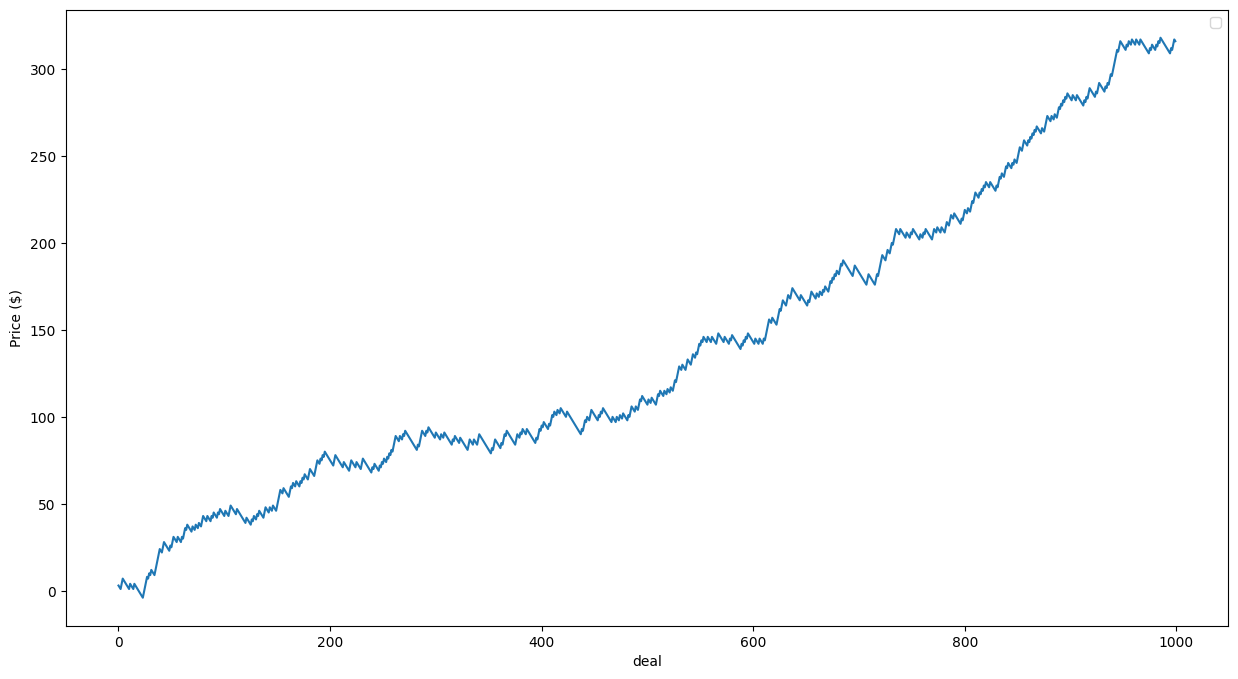

In [10]:
# check

import random
randomlist = []
for i in range(0,1000):
  n = random.randint(1,97)
  randomlist.append(n)
print(len(randomlist), randomlist)

#income curve
curve = []
q=0
for i in range(len(randomlist)):
  #print(i)
  if randomlist[i]%3 == 0:
    q += 3
    curve.append(q)
  else: 
    q -= 1
    curve.append(q)
print(len(curve), curve)
#plot
plt.figure(figsize=(15, 8))
plt.plot(curve)
plt.xlabel('deal')
plt.ylabel('Price ($)')
#plt.title(f'Local Maxima and Minima for {ticker}')
plt.legend()
plt.show()

In [ ]:
# simple trader
data['long_position'] = None
data['long_stop_loss'] = None
data['long_take_profit'] = None

data['short_position'] = None
data['short_stop_loss'] = None
data['short_take_profit'] = None

long_position_list = []
long_stop_loss_list = []
long_take_profit_list = []

short_position_list = []
short_stop_loss_list = []
short_take_profit_list = []

for i in range(len(data['high'])):
  #check the trend
  #place orders
  try:
    # LONG
    if (data['high'][i] > data['high'][i-1]) & \
       (data['low'][i] > data['low'][i-1]) & \
       (data['close'][i] > data['close'][i-1]):
      print(f'BUY {i}', data['close'][i-1])
      #open long position
      long_position = data['close'][i-1]
      data['long_position'][i] = long_position
      long_position_list.append(long_position)  
      #place SL
      stop_loss = data['low'][i-1] - 10
      data['long_stop_loss'][i] = stop_loss
      long_stop_loss_list.append(stop_loss)
      #place TP
      take_profit = long_position + (long_position - stop_loss) * 3
      data['long_take_profit'][i] = take_profit
      long_take_profit_list.append(take_profit)
    # SHORT
    if (data['high'][i] < data['high'][i-1]) & (data['low'][i] < data['low'][i-1]) & (data['close'][i] < data['close'][i-1]):
      print(f'SELL {i}', data['close'][i-1])
      #open SHORT position
      short_position = data['close'][i-1]
      data['short_position'][i] = short_position
      short_position_list.append(short_position)
      #place SHORT SL
      short_stop_loss = data['high'][i-1] + 10
      data['short_stop_loss'][i] = short_stop_loss
      short_stop_loss_list.append(short_stop_loss)
      #place SHORT TP
      short_take_profit = short_position - (short_stop_loss - short_position) * 3
      data['short_take_profit'][i] = short_take_profit
      short_take_profit_list.append(short_take_profit)
  except:
    print('')
data.head(5)

In [ ]:

#графики
#plotly
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

# Plot the three lines of the Bollinger Bands indicator
for parameter in ['moving_average', 'bol_lower', 'bol_upper']:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[parameter],
        showlegend = False,
        line_color = 'gray',
        mode='lines',
        line={'dash': 'dash'},
        marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['local_max'],
#                          showlegend = True,
#                          line_color = 'orange',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['local_min'],
#                          showlegend = True,
#                          line_color = 'skyblue',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
fig.add_trace(go.Scatter(x = data.index,
                         y = data['bottom'],
                         showlegend = True,
                         line_color = 'skyblue',
                         mode='markers',
                         line={'dash': 'dash'},
                         name='BUY signal',
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['long_stop_loss'],
#                          showlegend = True,
#                          line_color = 'red',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['long_take_profit'],
#                          showlegend = True,
#                          line_color = 'green',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
fig.add_trace(go.Scatter(x = data.index,
                         y = data['top'],
                         showlegend = True,
                         line_color = 'orange',
                         mode='markers',
                         line={'dash': 'dash'},
                         name = 'SELL signal',
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['short_stop_loss'],
#                          showlegend = True,
#                          line_color = 'red',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['short_take_profit'],
#                          showlegend = True,
#                          line_color = 'green',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the days_week vertical lines
for indexes, day in days_week.items():
    if day == 1:
        fig.add_vline(x=indexes, 
        line_width=1, 
        line_dash="dash", 
        line_color="green")
fig.update_layout(
    autosize=False,
    width= 1500,
fig.show()

In [ ]:
from datetime import datetime, timedelta

def get_next_monday():
    today = datetime.today()
    days_until_monday = (7 - today.weekday()) % 7
    next_monday = today + timedelta(days=days_until_monday)
    return next_monday.replace(hour=0, minute=0)

print(get_next_monday())

2023-05-15 00:00:49.276827


In [ ]:
1. Check top or bottom
2. Open position
3. Sl and tp
4. Close
5. Calculate PnL

##Posts

Bollinger bands

In [ ]:
#path to csv with data
path_6e = 'path_to_your.csv'

#load data from Gdrive
data_6e = pd.read_csv(path_6e, sep = ';')
data_6e['date_time'] = data_6e['OPEN_DATE'] + ' ' + data_6e['OPEN_TIME']
data_6e['date_time'] = pd.to_datetime(data_6e['date_time'])

#remove all index duplicates
data_6e = data_6e[~data_6e.index.duplicated(keep='last')]

#remove not important features (oprional)
data_6e.drop(['OPEN_DATE',	'OPEN_TIME',	'CLOSE_DATE',	'CLOSE_TIME'], axis =1, inplace = True)
data_6e.columns = map(str.lower, data_6e.columns)
data = data_6e
data.head()

# Define the parameters for the Bollinger Band calculation
ma_size = 21
bol_size = 2
column_name = 'close'

# Calculate the SMA
data.insert(0, 'moving_average', data[column_name].rolling(ma_size).mean())
    
# Calculate the upper and lower Bollinger Bands
data.insert(0, 'bol_upper', data['moving_average'] + data[column_name].rolling(ma_size).std() * bol_size)
data.insert(0, 'bol_lower', data['moving_average'] - data[column_name].rolling(ma_size).std() * bol_size)

# Remove the NaNs -> consequence of using a non-centered moving average (Optional)
if inplace_status == True:
  data.dropna(inplace=True)

In [ ]:
#Create class with Bollinger bands method

class Indicators():
  def getBollingerBand(
                       data: pd.DataFrame,
                       ma_size : int,
                       bol_size : int,
                       column_name : str,
                       inplace_status : bool ):
    '''
    Add Bollinger Band values to dataframe
    '''
    # Define the parameters for the Bollinger Band calculation
    ma_size = 21
    bol_size = 2
    column_name = 'close'

    # Calculate the SMA
    data.insert(0, 'moving_average', data[column_name].rolling(ma_size).mean())
    
    # Calculate the upper and lower Bollinger Bands
    data.insert(0, 'bol_upper', data['moving_average'] + data[column_name].rolling(ma_size).std() * bol_size)
    data.insert(0, 'bol_lower', data['moving_average'] - data[column_name].rolling(ma_size).std() * bol_size)

    if inplace_status == True:
    # Remove the NaNs -> consequence of using a non-centered moving average (Optional)
      data.dropna(inplace=True)
    return data

In [27]:
#графики
#plotly
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

# Plot the three lines of the Bollinger Bands indicator
for parameter in ['moving_average', 'bol_lower', 'bol_upper']:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[parameter],
        showlegend = False,
        line_color = 'gray',
        mode='lines',
        line={'dash': 'dash'},
        marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))
fig.show()

data science в трейдинге

In [28]:
data.head()

,bol_lower,bol_upper,moving_average,open,high,low,close,volume,delta,ask,bid,expiration,date_time,local_max,local_min
0,NaN,NaN,NaN,1.3264,1.3264,1.3203,1.3258,16820,578,8699,8121,03-13,2013-02-01 10:00:00,NaN,NaN
1,NaN,NaN,NaN,1.3259,1.3287,1.3245,1.3247,68962,-254,34354,34608,03-13,2013-02-01 14:00:00,1.3287,NaN
2,NaN,NaN,NaN,1.3252,1.3251,1.3162,1.3184,74321,-167,37077,37244,03-13,2013-02-01 18:00:00,NaN,1.3162
3,NaN,NaN,NaN,1.3183,1.3199,1.3183,1.3191,7326,352,3839,3487,03-13,2013-02-01 22:00:00,NaN,NaN
4,NaN,NaN,NaN,1.3183,1.3196,1.3185,1.3191,1508,-226,641,867,03-13,2013-02-01 22:00:00,NaN,NaN


In [37]:
fig = px.histogram(data, x="delta")
fig.update_layout(
    autosize=False,
    width= 800,
    height=500,)
fig.show()

In [36]:
fig = px.box(data, y="delta")
fig.update_layout(
    autosize=False,
    width= 500,
    height=800,)
fig.show()